<div style="display: flex; align-items: center; justify-content: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Escudo-UdeA.svg" width="150" style="margin-right: 20px;">
    <div>

# **Machine Learning I - Regresión**


# **Contenido**

1. Autores

2. Descripción corta del dataset

3. Objeto a desarrollar

4. Resumen del proceso realizado

5. Desarrollo de experimentos

• 5.1 Preparación de datos

• 5.2 División conjunto de datos.

6. Creación, entrenamiento y valuación entre modelos de clasificación.

7. Conclusiones

8. Referencias


# **1. Autores**

### Cristhian Ocampo Bolivar

### Maria Isabel Duque Buitrago

### Leidy Estefanía Silva Torres


# **2. Descripción corta del dataset**

La contaminación del aire es un problema ambiental crítico con efectos significativos en la salud pública y el ecosistema. En este proyecto, aplicaremos técnicas avanzadas de analítica de datos para examinar una base de datos que recopila registros de PM2.5 durante cuatro años, junto con variables meteorológicas como temperatura (TEMP), presión atmosférica (PRES), punto de rocío (DEWP), acumulado de horas de nieve (Is), entre otras.

Antes de desarrollar modelos predictivos, se llevará a cabo un ETL, abordando aspectos clave como:

✔ Manejo de valores nulos y datos inconsistentes.

✔ Conversión de variables en formatos adecuados para el análisis.

✔ Análisis exploratorio de datos (EDA) para identificar correlaciones y patrones entre las variables climáticas y la contaminación.

A continuación, se presenta una tabla con la definición de las variables utilizadas en el proyecto:

| Attribute Name | Definition                          |
| -------------- | ----------------------------------- |
| No             | No: row number                      |
| Year           | Year: year of data in this row      |
| Month          | Month: month of data in this row    |
| Day            | Day: day of data in this row        |
| Hour           | Hour: hour of data in this row      |
| PM2.5          | PM2.5: PM2.5 concentration (ug/m^3) |
| DEWP           | DEWP: Dew Point (℃)                 |
| TEMP           | TEMP: Temperature (℃)               |
| PRES           | PRES: Pressure (hPa)                |
| cbwd           | cbwd: Combined wind direction       |
| Iws            | Iws: Cumulated wind speed (m/s)     |
| Ir             | Ir: Cumulated hours of snow         |
| Is             | Is: Cumulated hours of rain         |


# **3. Objetivo a desarrollar**

El objetivo principal de este proyecto es desarrollar un sistema predictivo que permita estimar los niveles de concentración de partículas finas en suspensión (PM2.5) en el aire. Estas partículas representan un importante riesgo para la salud pública y el medio ambiente, por lo que contar con herramientas que anticipen su comportamiento resulta fundamental para apoyar la toma de decisiones de medidas de alertas tempranas.

Para alcanzar este objetivo, se llevará a cabo el diseño, implementación y validación de múltiples modelos de Machine Learning, explorando diferentes tecnicas que puedan capturar patrones en los datos históricos. Cada modelo será entrenado utilizando un conjunto de datos con variables meteorológicas y temporales relevantes, y su rendimiento será evaluado con métricas estadísticas apropiadas como el error cuadrático medio (RMSE), el coeficiente de determinación (R²) y el error absoluto medio (MAE), entre otras.

Además, se busca crear una aplicación interactiva que facilite el uso del modelo por parte de usuarios no técnicos, permitiendo introducir condiciones climáticas específicas y obtener una predicción inmediata del nivel estimado de PM2.5.


# **4. Resumen del proceso realizado**

Este proyecto abordó la predicción de contaminación por PM2.5 utilizando datos climáticos como temperatura, presión, viento y precipitaciones. Se limpiaron y transformaron los datos, se exploraron patrones relevantes mediante análisis visual y estadístico, y se entrenaron varios modelos de regresión. El modelo Random Forest obtuvo el mejor rendimiento con un R² de 0.84. Finalmente, se guardó el modelo entrenado para su uso futuro, destacando su potencial para apoyar decisiones en salud pública y medio ambiente.


# **5. Desarrollo de experimentos**


Para el desarrollo de este proyecto se diseñó una estrategia experimental enfocada en la comparación y evaluación de distintos algoritmos de regresión, con el objetivo de seleccionar el modelo que mejor se desempeñe al predecir los niveles futuros de PM2.5 a partir de datos meteorológicos y temporales.

Se han implementado seis modelos de regresión supervisada ampliamente utilizados en tareas de predicción:

- **Regresión Lineal (Linear Regression)**
- **Árboles de Decisión (Decision Tree Regressor)**
- **Gradient Boosting Regressor**
- **K-Nearest Neighbors (KNN)**
- **Random Forest Regressor**
- **Support Vector Regressor (SVR)**

Cada uno de estos modelos fue entrenado utilizando un conjunto de datos preprocesado, y se aplicaron técnicas de ajuste de hiperparámetros como Grid Search y Randomized Search, en combinación con validación cruzada (cross-validation), para optimizar su rendimiento y minimizar el riesgo de overfitting.


##5.1 • Preparación de datos


Librerias


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

Carga de datos


In [ ]:
df = pd.read_csv('data.txt')
df.info()
df_m = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
def conv_time(df):
    df['date']=pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df = df.set_index('date')
    return df
def drop_cols(df):
    df = df.drop(columns=['No', 'year','month', 'day','hour'])
    df.head()
    return df

df_m = conv_time(df_m)
df = conv_time(df)
df = drop_cols(df)
df

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


datos faltantes


In [ ]:
df['pm2.5'] = df['pm2.5'].replace(0, np.nan)
def null_pertenages(df):
    null_percentages = df.isnull().mean().mul(100).round(2)

    null_percentage_table = pd.DataFrame({
        'Column': null_percentages.index,
        'Null Percentage (%)': null_percentages.values
    })
    return null_percentage_table
null_pertenages(df)

,Column,Null Percentage (%)
0,pm2.5,4.72
1,DEWP,0.00
2,TEMP,0.00
3,PRES,0.00
4,cbwd,0.00
5,Iws,0.00
6,Is,0.00
7,Ir,0.00


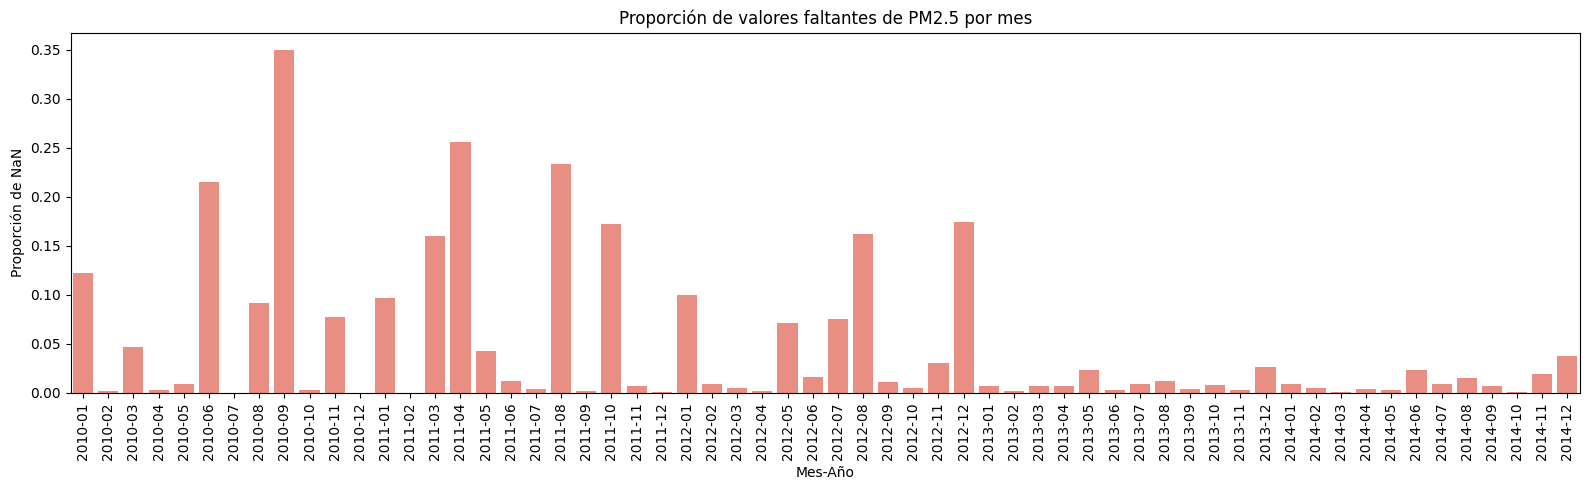

In [ ]:
miss = (
    df['pm2.5']
    .resample('M')
    .apply(lambda x: x.isna().mean())
    .reset_index()
)

miss['year_month'] = miss['date'].dt.strftime('%Y-%m')

plt.figure(figsize=(16, 5))
sns.barplot(data=miss, x='year_month', y='pm2.5', color='salmon')
plt.xticks(rotation=90)
plt.title('Proporción de valores faltantes de PM2.5 por mes')
plt.ylabel('Proporción de NaN')
plt.xlabel('Mes-Año')
plt.tight_layout()
plt.show()

Según el análisis de la base de datos, aproximadamente el 5% de los registros de contaminación carecen de valores definidos en diferentes horas del día. Para preservar la integridad de los datos se eliminaron los valores nulos.


In [ ]:
def remove_null_pm25(df):
    return df.dropna(subset=['pm2.5'])
data = remove_null_pm25(df)
df_m = df_m.drop(columns=['No'])
df_m = remove_null_pm25(df_m)

In [ ]:
df_m = df_m.dropna(subset=['pm2.5'])
data = data.dropna(subset=['pm2.5'])
df = data
df

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


Visualización


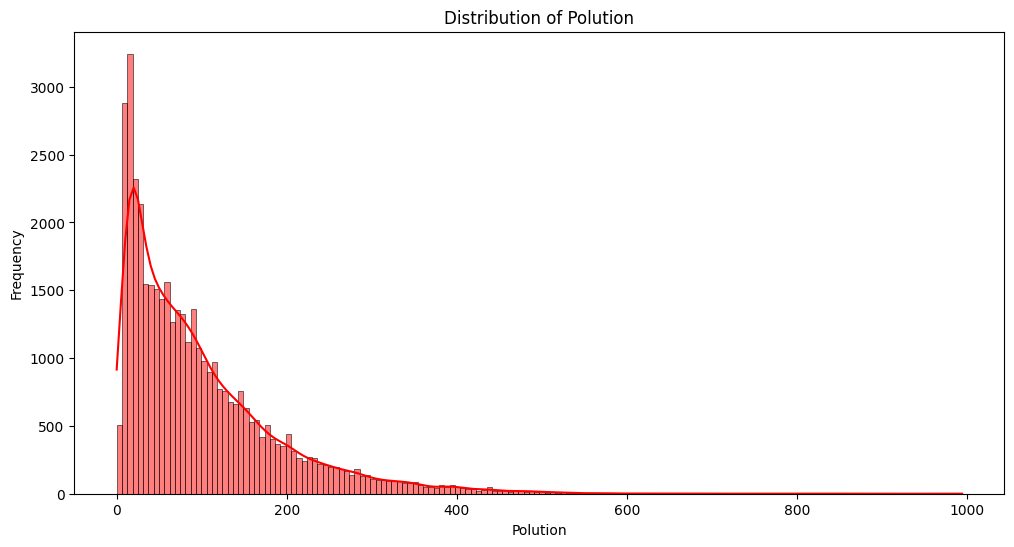

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64

In [ ]:
def distribution(df,n):
    polution = df['pm2.5']
    polution = np.power(polution, n)
    plt.figure(figsize=(12, 6))
    sns.histplot(polution, kde=True, color='r')
    plt.title('Distribution of Polution')
    plt.xlabel('Polution')
    plt.ylabel('Frequency')
    plt.show()
    return polution.describe()
distribution(df_m,1)

_Se observa una distribución asimétrica con una cola larga hacia la derecha. La mayoría de los valores de contaminación están concentrados en niveles bajos, entre 0 y 200, con una frecuencia que disminuye gradualmente a medida que aumenta el nivel de contaminación. De acuerdo al resultado obtenido se podría indicar que el nivel de contaminación se ajusta a una distribución exponencial decreciente._


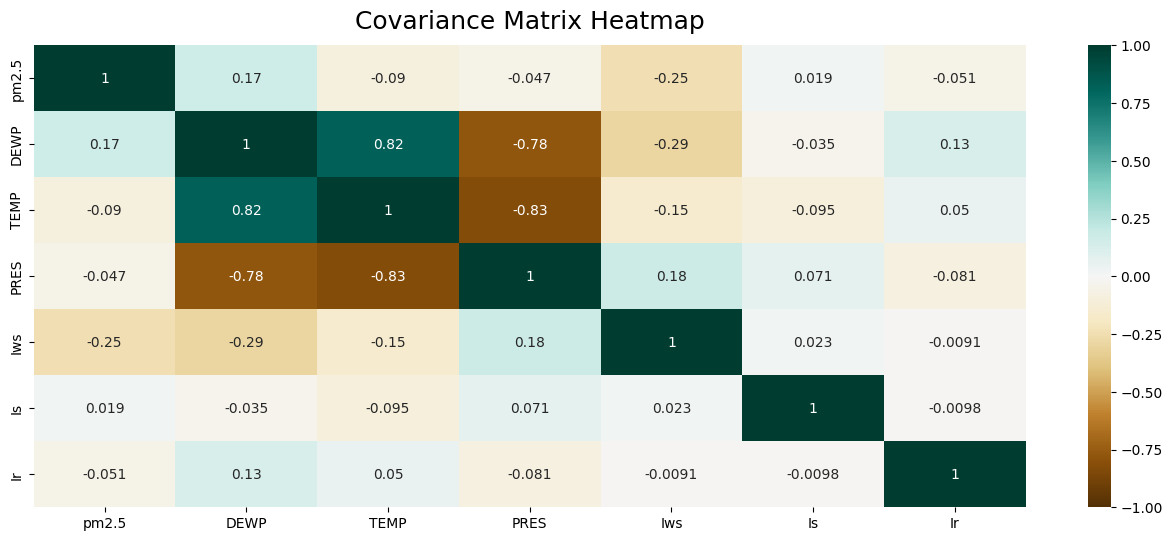

In [ ]:
def covariance_heatmap(df):
    data_num = df.drop(df.select_dtypes(include=['object']).columns,axis=1)
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(data_num.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Covariance Matrix Heatmap', fontdict={'fontsize':18}, pad=12);
covariance_heatmap(data)

_La matriz de covarianza revela las relaciones más importantes entre las variables climáticas y la concentración de PM2.5:_

- **DEWP y TEMP** tienen una fuerte correlación positiva (0.82), indicando que a mayor temperatura, también aumenta el punto de rocío.
- **PRES y TEMP** (-0.83) y **PRES y DEWP** (-0.78) muestran correlaciones negativas, sugiriendo que, en condiciones más cálidas y húmedas, la presión atmosférica disminuye.
- **Iws** tiene una correlación negativa moderada con **PM2.5** (-0.24), indicando que a mayor velocidad del viento, aumentan los niveles de contaminación.
- En resumen, la **humedad y la temperatura** influyen fuertemente en la **presión**, mientras que a mayor **velocidad de viento**, se genera una dispersión mejor de las particulas PM2.5 lo cual contribuye en una disminución significativa de la contaminación.


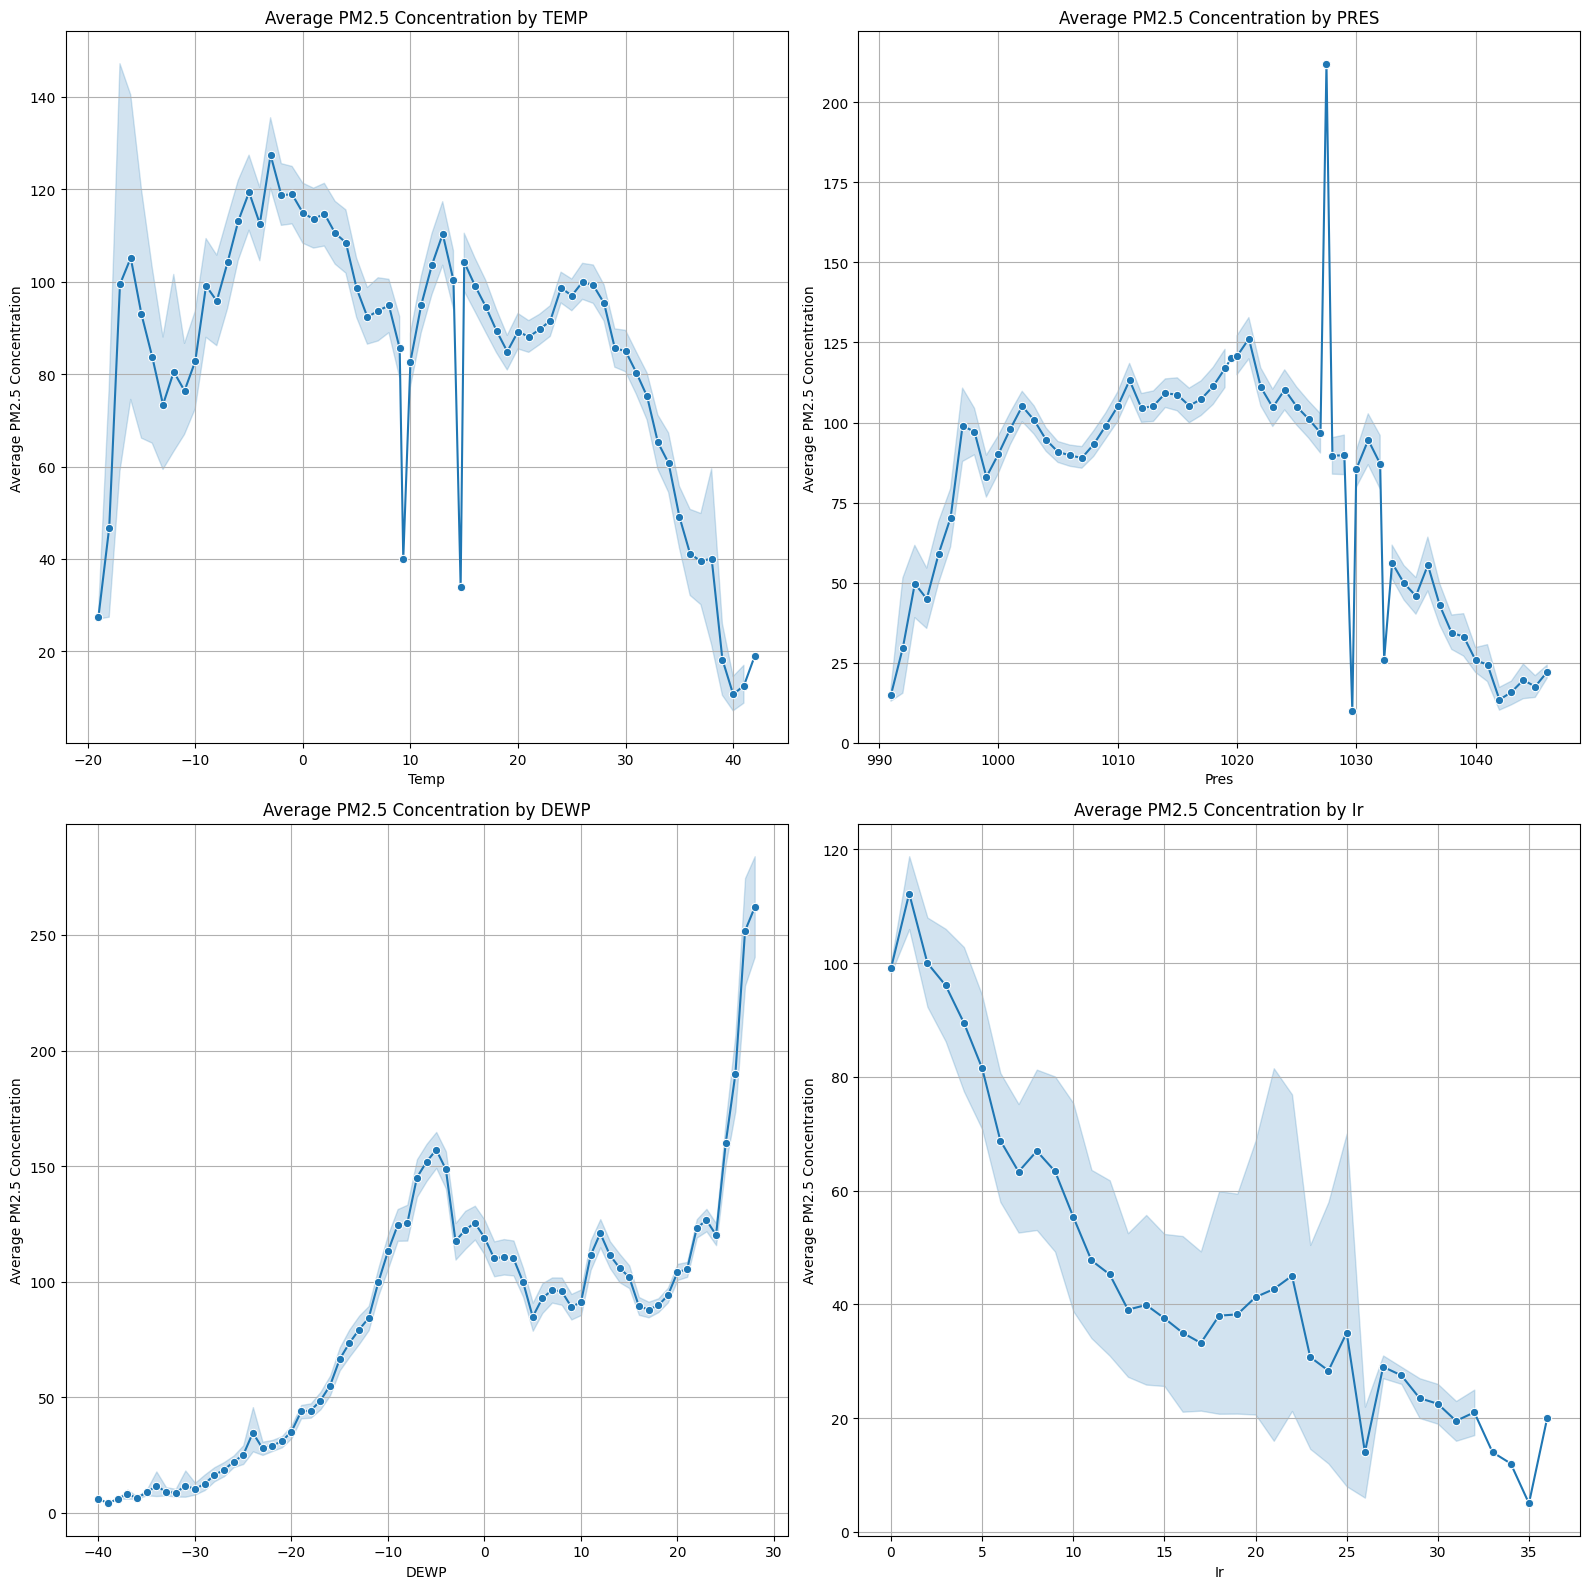

In [ ]:
def plot_pm25(df):
    plot_params = [
        {'x': 'TEMP', 'y': 'pm2.5', 'title': 'Average PM2.5 Concentration by TEMP', 'xlabel': 'Temp'},
        {'x': 'PRES', 'y': 'pm2.5', 'title': 'Average PM2.5 Concentration by PRES', 'xlabel': 'Pres'},
        {'x': 'DEWP', 'y': 'pm2.5', 'title': 'Average PM2.5 Concentration by DEWP', 'xlabel': 'DEWP'},
        {'x': 'Ir', 'y': 'pm2.5', 'title': 'Average PM2.5 Concentration by Ir', 'xlabel': 'Ir'},
    ]

    fig, axes = plt.subplots(2, 2, figsize=(16, 16))

    for i, params in enumerate(plot_params):
        row, col = divmod(i, 2)
        sns.lineplot(ax=axes[row, col], x=params['x'], y=params['y'], data=df, marker='o')
        axes[row, col].set_title(params['title'])
        axes[row, col].set_xlabel(params['xlabel'])
        axes[row, col].set_ylabel('Average PM2.5 Concentration')
        axes[row, col].grid(True)

    plt.tight_layout()
    plt.show()

plot_pm25(data)

Al observar la gráfica de PM2.5 en función de la temperatura se puede observar que a temperaturas muy bajas (por debajo de 0°C), la concentración de PM2.5 tiende a decrecer. A temperaturas moderadas (entre 0°C y 20°C), la contaminación tiende a mantenerse alta y estable. A temperaturas altas (por encima de 30°C), la concentración de PM2.5 disminuye drásticamente. Se observa que se presenta una variabilidad entre los datos, que puede esta influenciada por otros agentes externos.

_La gráfica muestra la relación entre la presión atmosférica (PRES) y la concentración promedio de PM2.5. Se observa un patrón en el que a presiones bajas (<1020 hPa): La concentración de PM2.5 es elevada, alcanzando valores entre 100 y 125 µg/m³. Esto indica que en condiciones de baja presión, el aire menos denso podría favorecer la acumulación de contaminantes en la superficie. Por otra parte, a presiones altas (>1030 hPa), la concentración de PM2.5 disminuye progresivamente, sugiriendo que una mayor presión atmosférica favorece la dispersión de contaminantes y reduce los niveles de PM2.5._

_Por otra parte, a medida que el punto de rocío (DEWP) aumenta, la concentración de PM2.5 también tiende a incrementarse. Además, a partir de DEWP = 20, se observa un aumento abrupto en la concentración de PM2.5, que alcanza valores superiores a 250, lo que sugiere que cuando hay mayor humedad en el aire, la contaminación tiende a empeorar significativamente._

_Finalmente, la cuarta gráfica sugiere que, a medida que aumentan las horas de lluvia, la concentración de PM2.5 tiende a disminuir. La lluvia actúa como un agente de limpieza del aire, atrapando partículas contaminantes y eliminándolas del ambiente._


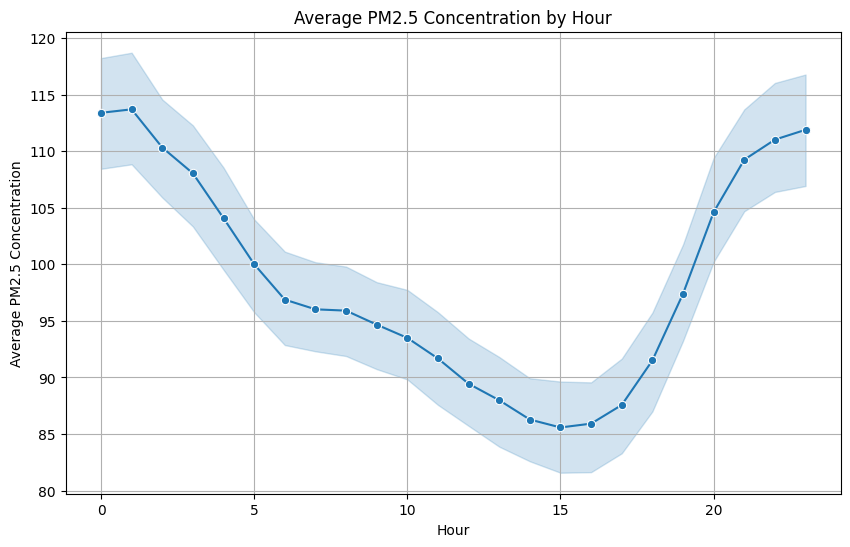

In [ ]:
def plot_hour(df):
    plt.figure(figsize=(10, 6))
    df_temp = df.copy()
    df_temp['hour'] = df_temp.index.hour

    sns.lineplot(x='hour', y='pm2.5', data=df_temp, marker='o')
    plt.title('Average PM2.5 Concentration by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Average PM2.5 Concentration')
    plt.grid(True)
    plt.show()

plot_hour(data)

La gráfica muestra el comportamiento de la concentración promedio de PM2.5 a lo largo del día, revelando un patrón cíclico con picos y descensos bien definidos. Durante el rango horario nocturno, desde las 7:00 PM hasta las 5:00 AM, la concentración de PM2.5 es alta, alcanzando valores cercanos a 115, lo que indica un aumento de la polución en este periodo.

Este comportamiento sugiere que hay momentos del día en los que la calidad del aire empeora notablemente. El incremento nocturno de la concentración de PM2.5 podría estar relacionado con factores como la menor circulación de aire, el aumento de la actividad industrial, y la acumulación de contaminantes.

La disminución observada durante la mañana y el mediodía podría deberse a una mayor actividad atmosférica y a la ventilación natural del aire. La variabilidad observada, con intervalos de confianza más amplios en la madrugada y la tarde, podría reflejar fluctuaciones en los niveles de polución debido al tráfico o a cambios en las condiciones meteorológicas.


preparación de datos


In [ ]:
df_m

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_dum = encoder.fit_transform(df_m[['cbwd']])
df_dum = pd.DataFrame(df_dum, columns=encoder.get_feature_names_out(['cbwd']), index=df_m.index)
dummy_columns = encoder.get_feature_names_out(['cbwd']).tolist()
df_dum

,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
date,,,,
2010-01-02 00:00:00,0.0,0.0,1.0,0.0
2010-01-02 01:00:00,0.0,0.0,1.0,0.0
2010-01-02 02:00:00,0.0,0.0,1.0,0.0
2010-01-02 03:00:00,0.0,0.0,1.0,0.0
2010-01-02 04:00:00,0.0,0.0,1.0,0.0
...,...,...,...,...
2014-12-31 19:00:00,0.0,1.0,0.0,0.0
2014-12-31 20:00:00,0.0,1.0,0.0,0.0
2014-12-31 21:00:00,0.0,1.0,0.0,0.0


In [ ]:
df_m = pd.concat([df_m.drop(columns='cbwd'), df_dum], axis=1)
df_m

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
date,,,,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0,0.0,0.0,1.0,0.0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0,0.0,0.0,1.0,0.0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0,0.0,0.0,1.0,0.0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0,0.0,0.0,1.0,0.0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0,0,0.0,1.0,0.0,0.0
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0,0,0.0,1.0,0.0,0.0
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0,0,0.0,1.0,0.0,0.0


In [ ]:
X = df_m.drop('pm2.5', axis=1)
y = df_m['pm2.5']

Transformaciones.


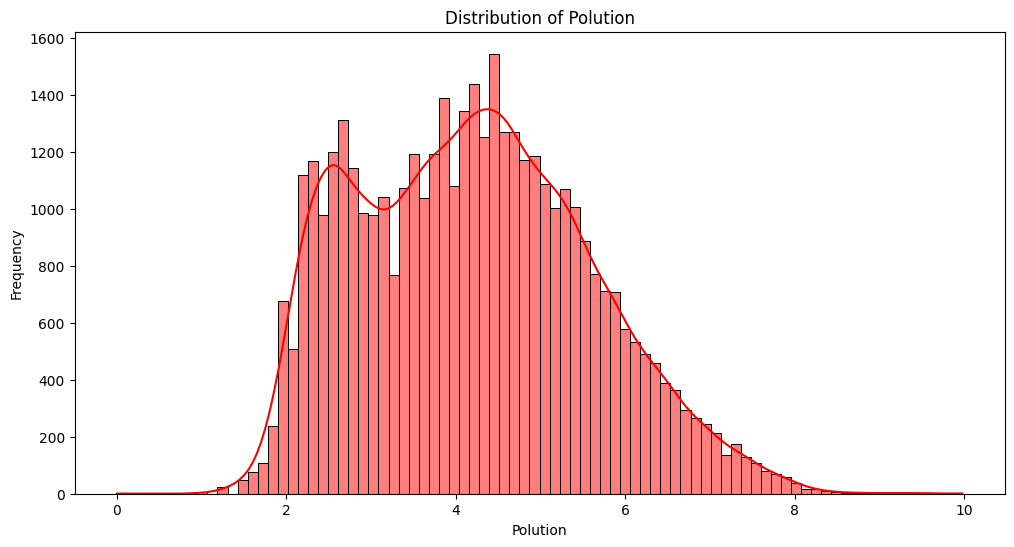

count    41757.000000
mean         4.200476
std          1.371547
min          0.000000
25%          3.072317
50%          4.160168
75%          5.155137
max          9.979960
Name: pm2.5, dtype: float64

In [ ]:
def distribution(df,n):
    polution = df['pm2.5']
    polution = np.power(polution, n)
    plt.figure(figsize=(12, 6))
    sns.histplot(polution, kde=True, color='r')
    plt.title('Distribution of Polution')
    plt.xlabel('Polution')
    plt.ylabel('Frequency')
    plt.show()
    return polution.describe()
distribution(df_m,1/3)

# 5.2 División de los datos


In [ ]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

X_compl, X_test, y_compl, y_test = split_data(X, y)
X_train, X_val, y_train, y_val = split_data(X_compl, y_compl)

In [ ]:
X_compl.shape, X_train.shape, X_test.shape, X_val.shape, y_compl.shape , y_train.shape, y_test.shape, y_val.shape

((33405, 14),
 (26724, 14),
 (8352, 14),
 (6681, 14),
 (33405,),
 (26724,),
 (8352,),
 (6681,))

In [ ]:
numeric_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'year', 'month', 'day', 'hour']
non_numeric_cols = ['cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']

scaler = MinMaxScaler()
scaler.fit(X_compl[numeric_cols])

def scale_and_combine(df):
    scaled_numeric = pd.DataFrame(scaler.transform(df[numeric_cols]), columns=numeric_cols, index=df.index)
    preserved_non_numeric = df[non_numeric_cols].copy()
    return pd.concat([scaled_numeric, preserved_non_numeric], axis=1)

X_compl = scale_and_combine(X_compl)
X_train = scale_and_combine(X_train)
X_test = scale_and_combine(X_test)
X_val = scale_and_combine(X_val)

# **6.Creación, entrenamiento y valuación entre modelos de clasificación.**

Todos los modelos fueron evaluados de manera consistente, utilizando métricas de desempeño como el error cuadrático medio (RMSE), error absoluto medio (MAE) y coeficiente de determinación (R²), lo cual permitirá identificar de manera objetiva cuál de ellos será integrado en una futura aplicación para la predicción de calidad del aire.


In [ ]:
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def train_decision_tree(X_train, y_train):
    params = {'max_depth': [5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
    grid = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

def train_gradient_boosting(X_train, y_train):
    params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    grid = GridSearchCV(GradientBoostingRegressor(random_state=42), params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

def train_knn(X_train, y_train):
    params = {'n_neighbors': [5,10,15,20], 'weights': ['uniform', 'distance'],'p': [1, 2],'leaf_size': [10, 20, 30]}
    grid = GridSearchCV(KNeighborsRegressor(), params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

def train_random_forest(X_train, y_train):
    params = { 'n_estimators': [100, 200, 300, 400], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
    grid = RandomizedSearchCV( RandomForestRegressor(random_state=42), param_distributions=params, n_iter=50, cv=10, verbose=0, random_state=42, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

def train_svr(X_train, y_train):
    params = {'C': [0.1, 1], 'kernel': ['linear', 'rbf'], 'epsilon': [0.1, 0.2]}
    grid = GridSearchCV(SVR(), params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modelo"):
    if hasattr(model, "best_estimator_"):
        best_model = model.best_estimator_
        best_params = model.best_params_
    else:
        best_model = model
        best_params = "N/A"

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mse_train ** 0.5
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mse_test ** 0.5
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f'📊 {model_name} - TEST - MSE: {mse_test:.4f} | RMSE: {rmse_test:.4f} | MAE: {mae_test:.4f} | R²: {r2_test:.4f}')
    print(f'📊 {model_name} - TRAIN - MSE: {mse_train:.4f} | RMSE: {rmse_train:.4f} | MAE: {mae_train:.4f} | R²: {r2_train:.4f}')
    print(f'🔧 {model_name} - Mejores hiperparámetros: {best_params}')

    return {
        'Modelo': model_name,
        'Train_MSE': mse_train,
        'Test_MSE': mse_test,
        'Train_RMSE': rmse_train,
        'Test_RMSE': rmse_test,
        'Train_MAE': mae_train,
        'Test_MAE': mae_test,
        'Train_R²': r2_train,
        'Test_R²': r2_test,
        'Mejores Hiperparámetros': best_params
    }

In [ ]:
def run_all_models(X_compl, X_train, X_test, y_compl, y_train, y_test):
    results = []
    trained_models = {}

    # Linear Regression con transformación
    lr_model = train_linear_regression(X_train, np.cbrt(y_train))
    results.append(evaluate_model(lr_model, X_train, np.cbrt(y_train), X_test, np.cbrt(y_test), "Linear Regression"))
    trained_models["Linear Regression"] = lr_model

    # Decision Tree
    dt_model = train_decision_tree(X_compl, y_compl)
    results.append(evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree"))
    trained_models["Decision Tree"] = dt_model

    # Gradient Boosting
    gb_model = train_gradient_boosting(X_compl, y_compl)
    results.append(evaluate_model(gb_model, X_train, y_train, X_test, y_test, "Gradient Boosting"))
    trained_models["Gradient Boosting"] = gb_model

    # KNN
    knn_model = train_knn(X_compl, y_compl)
    results.append(evaluate_model(knn_model, X_train, y_train, X_test, y_test, "KNN"))
    trained_models["KNN"] = knn_model

    # SVR
    svr_model = train_svr(X_compl, y_compl)
    results.append(evaluate_model(svr_model, X_train, y_train, X_test, y_test, "SVR"))
    trained_models["SVR"] = svr_model

    # Random Forest
    rf_model = train_random_forest(X_compl, y_compl)
    results.append(evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest"))
    trained_models["Random Forest"] = rf_model

    summary_df = pd.DataFrame(results).sort_values(by="Test_R²", ascending=False)

    return results, summary_df, trained_models
results, summary_df, trained_models = run_all_models(X_compl, X_train, X_test, y_compl, y_train, y_test)

📊 Linear Regression - TEST - MSE: 1.1602 | RMSE: 1.0771 | MAE: 0.8528 | R²: 0.3856
📊 Linear Regression - TRAIN - MSE: 1.1480 | RMSE: 1.0714 | MAE: 0.8565 | R²: 0.3867
🔧 Linear Regression - Mejores hiperparámetros: N/A
📊 Decision Tree - TEST - MSE: 3739.3202 | RMSE: 61.1500 | MAE: 40.5558 | R²: 0.5756
📊 Decision Tree - TRAIN - MSE: 2847.2208 | RMSE: 53.3594 | MAE: 36.5314 | R²: 0.6560
🔧 Decision Tree - Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
📊 Gradient Boosting - TEST - MSE: 2767.7170 | RMSE: 52.6091 | MAE: 34.8250 | R²: 0.6859
📊 Gradient Boosting - TRAIN - MSE: 2088.1494 | RMSE: 45.6963 | MAE: 31.7039 | R²: 0.7477
🔧 Gradient Boosting - Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
📊 KNN - TEST - MSE: 2132.6049 | RMSE: 46.1801 | MAE: 26.9749 | R²: 0.7580
📊 KNN - TRAIN - MSE: 0.0000 | RMSE: 0.0000 | MAE: 0.0000 | R²: 1.0000
🔧 KNN - Mejores hiperparámetros: {'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 

In [ ]:
display(summary_df)

,Modelo,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_R²,Test_R²,Mejores Hiperparámetros
5,Random Forest,162.061967,1382.973261,12.730356,37.188348,7.947601,21.912710,0.980420,0.843049,"{'n_estimators': 400, 'min_samples_split': 2, ..."
3,KNN,0.000000,2132.604942,0.000000,46.180136,0.000000,26.974907,1.000000,0.757975,"{'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'w..."
2,Gradient Boosting,2088.149350,2767.716951,45.696273,52.609096,31.703926,34.824972,0.747712,0.685898,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,Decision Tree,2847.220839,3739.320195,53.359356,61.149981,36.531379,40.555815,0.656001,0.575633,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
0,Linear Regression,1.147999,1.160232,1.071447,1.077141,0.856528,0.852757,0.386683,0.385623,N/A
4,SVR,7018.384876,7534.887073,83.775801,86.803727,54.024805,54.400857,0.152045,0.144882,"{'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}"


,Modelo,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_R²,Test_R²,Mejores Hiperparámetros
5,Random Forest,162.061967,1382.973261,12.730356,37.188348,7.947601,21.912710,0.980420,0.843049,"{'n_estimators': 400, 'min_samples_split': 2, ..."
3,KNN,0.000000,2132.604942,0.000000,46.180136,0.000000,26.974907,1.000000,0.757975,"{'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'w..."
2,Gradient Boosting,2088.149350,2767.716951,45.696273,52.609096,31.703926,34.824972,0.747712,0.685898,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,Decision Tree,2847.220839,3739.320195,53.359356,61.149981,36.531379,40.555815,0.656001,0.575633,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
0,Linear Regression,1.147999,1.160232,1.071447,1.077141,0.856528,0.852757,0.386683,0.385623,N/A
4,SVR,7018.384876,7534.887073,83.775801,86.803727,54.024805,54.400857,0.152045,0.144882,"{'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}"


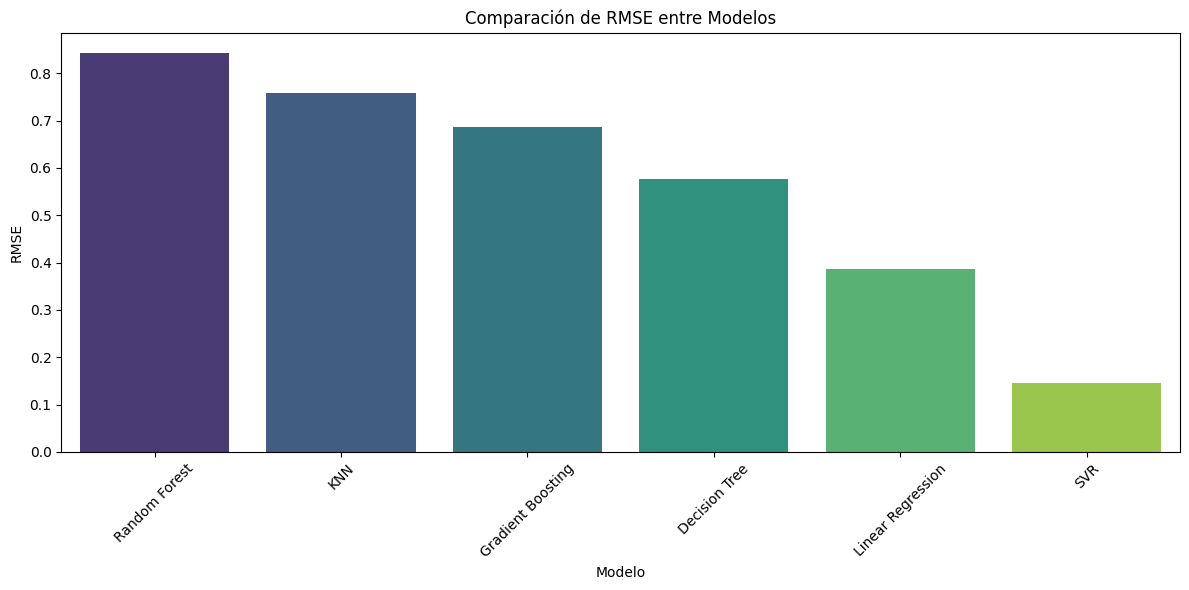

In [ ]:
def graficar_resultados(summary_df):
    display(summary_df)

    plt.figure(figsize=(12, 6))
    sns.barplot(x="Modelo", y="Test_R²", data=summary_df, palette="viridis")
    plt.title("Comparación de RMSE entre Modelos")
    plt.xticks(rotation=45)
    plt.ylabel("RMSE")
    plt.tight_layout()
    plt.show()
graficar_resultados(summary_df)

# Analisis de resultados de los modelos entrenados:

Debido a los resultados obtenidos con Random Forest frente a los demás modelos, se optará por este modelo, ya que presenta un mejor rendimiento según sus métricas, como **MSE, MAE y R²**.

A continuación, se analizan los resultados obtenidos con el modelo **Random Forest**:

- **Error Cuadrático Medio (MSE)**

El valor de 1213.16 representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Cuanto más bajo sea este valor, mejor es el ajuste del modelo.

- **Raíz del Error Cuadrático Medio (RMSE)**

El valor de 34.83 indica que, en promedio, las predicciones del modelo se desvían del valor real en aproximadamente 34.8 unidades. Esta métrica es sensible a errores grandes.

- **Error Absoluto Medio (MAE)**

Con un valor de 21.71, se interpreta que las predicciones del modelo se desvían, en promedio, unas 21.7 unidades del valor real, sin importar si la predicción fue mayor o menor.

- **R² (Coeficiente de Determinación)**

El valor de 0.8473 sugiere que el modelo explica aproximadamente el 84.7% de la variabilidad en los valores de pm2.5 a partir de las variables predictoras utilizadas.


# **7. Conclusiones.**

- A lo largo del proyecto se analizó la relación entre la concentración de partículas contaminantes PM2.5 y variables meteorológicas como la temperatura, presión atmosférica, punto de rocío, intensidad del viento, así como las horas acumuladas de precipitación. Este análisis permitió detectar patrones y correlaciones significativas que afectan los niveles de contaminación, aportando una base sólida para la modelización predictiva y decisiones basadas en evidencia.

- Se integraron diversas técnicas de ciencia de datos, incluyendo análisis exploratorio, visualización y evaluación de modelos predictivos, con el objetivo de comprender de forma integral los factores que inciden en la contaminación del aire. Esta combinación permitió no solo extraer insights valiosos, sino también validar el comportamiento de diferentes algoritmos en el contexto del problema.

- Entre los modelos evaluados, Random Forest fue el que obtuvo el mejor desempeño, alcanzando un R² de 0.84 al predecir los niveles de PM2.5. Este resultado sugiere que este algoritmo es capaz de capturar relaciones no lineales y complejas entre las variables meteorológicas y los niveles de contaminación, siendo una herramienta efectiva para tareas de monitoreo y pronóstico ambiental.


# **8. Referencias.**

- Metodos de regresión: https://scikit-learn.org/stable/supervised_learning.html

- Dataset empleado: https://www.kaggle.com/datasets/djhavera/beijing-pm25-data-data-set

- Escalar los datos: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

- Metricas de evaluación: https://scikit-learn.org/stable/modules/model_evaluation.html

- Dummificación: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


In [ ]:
joblib.dump(trained_models["Random Forest"], "random_forest_model.pkl")
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(dummy_columns, 'cbwd_columns.pkl')

['cbwd_columns.pkl']

# <p style="background-color:hsla(50, 33%, 25%, .75);; font-family:calibri; color:white; font-size:70%; text-align:center; border-radius:50px 50px;">EJEMPLO</p>


In [ ]:
# 1. Punto crudo de entrada
sample = {
    'year': 2025,
    'month': 5,
    'day': 3,
    'hour': 2,
    'DEWP': -18,
    'TEMP': 15.0,
    'PRES': 1021.0,
    'cbwd': 'NW',
    'Iws': 1.79,
    'Is': 0,
    'Ir': 0}

# 2. Convertir en DataFrame
df_sample = pd.DataFrame([sample])

# 3. Cargar scaler, modelo y columnas dummy
scaler = joblib.load("scaler.pkl")
model = joblib.load("random_forest_model.pkl")
dummy_columns = joblib.load("cbwd_columns.pkl")  # debe contener ['cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']

# 4. Escalar variables numéricas
numeric_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'year', 'month', 'day', 'hour']
scaled_numeric = pd.DataFrame(
    scaler.transform(df_sample[numeric_cols]),
    columns=numeric_cols
)

# 5. Generar columnas dummy para cbwd
cbwd_value = df_sample['cbwd'].iloc[0].strip()
cbwd_dummies = {col: 0 for col in dummy_columns}
col_name = f'cbwd_{cbwd_value}'
if col_name in cbwd_dummies:
    cbwd_dummies[col_name] = 1
cbwd_df = pd.DataFrame([cbwd_dummies])

# 6. Concatenar y asegurar orden correcto
input_model = pd.concat([scaled_numeric, cbwd_df], axis=1)
input_model = input_model[numeric_cols + dummy_columns]

# 7. Realizar predicción
prediction = model.predict(input_model)
print(f"Predicción del modelo Random Forest para el dato sintético: {prediction[0]:.2f}")

Predicción del modelo Random Forest para el dato sintético: 23.91
